# Updated Explore Exercises

Exercise

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import acquire
import prepare
import explore

In [2]:
explore.set_plotting_defaults()

In [ ]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

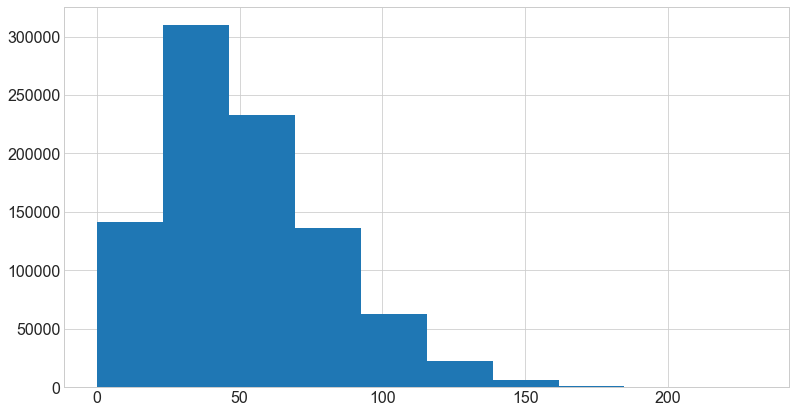

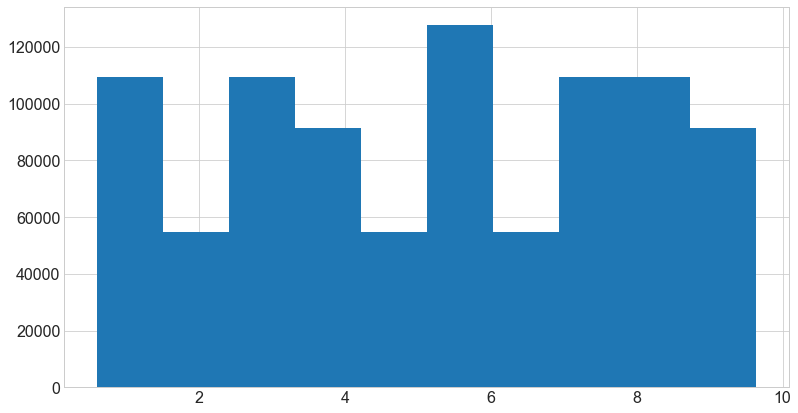

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00


In [4]:
stores = acquire.get_store_data()
stores = prepare.prep_store_data(stores)
stores.head()

In [ ]:
pd.__version__

In [5]:
targetdf = explore.total_sales_df(stores, 'sales_total', 'D')

In [ ]:
df = stores[['sales_total']]
df = df.resample('D').sum()

df.head()

In [ ]:
df.isna().sum()
# get error: float() argument must be a string or a number, not 'Timestamp'
# worked with Zach, matplotlib not liking timestamp, switched to plotting with pandas

In [ ]:
targetdf.head()

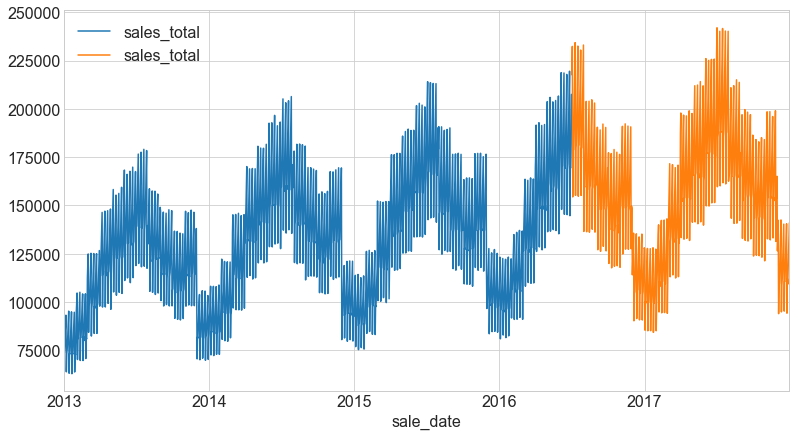

In [6]:
train1, test1 = explore.split_data_percent(targetdf)

In [ ]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end
# changed plotting here to pandas instead of matplotlib
ax = train.plot()
test.plot(ax=ax)

In [ ]:
# alternative Human based split method, use for germany data
# train = df[:'2016'] # includes 2016
# test = df['2017']

# plt.plot(train.index, train.temp)
# plt.plot(test.index, test.temp)

In [ ]:
def split_human(df, yearcut1, year2):
    # alternative Human based split method, use for germany data
    train = df[:yearcut1] # includes 2016
    test = df[year2]

    ax = train.plot()
    test.plot(ax=ax)
    return train, test

In [ ]:
train2, test2 = split_human(targetdf, '2016', '2017')

In [8]:
# set target as y - in this case using previous sales to predict future sales
y = train1.sales_total
y.head()

sale_date
2013-01-01 00:00:00+00:00    73844.01
2013-01-02 00:00:00+00:00    73570.58
2013-01-03 00:00:00+00:00    78169.48
2013-01-04 00:00:00+00:00    84467.73
2013-01-05 00:00:00+00:00    87621.85
Freq: D, Name: sales_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

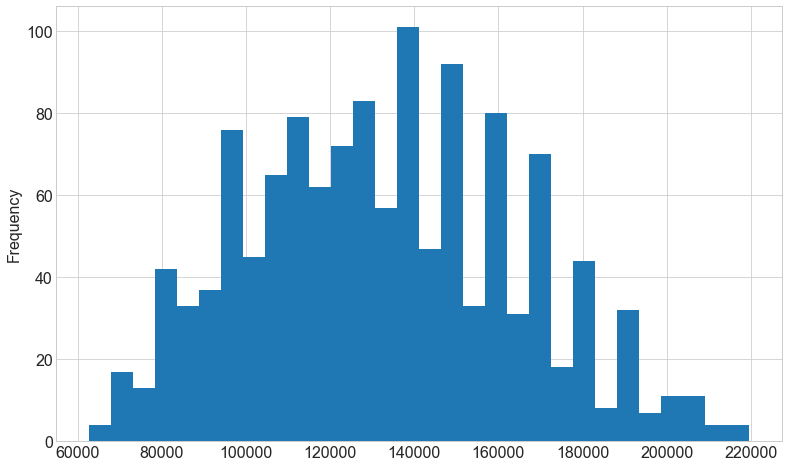

In [9]:
# don't consider the time series
plt.figure(figsize=(13,8))
y.plot.hist(bins=30)

<AxesSubplot:xlabel='month'>

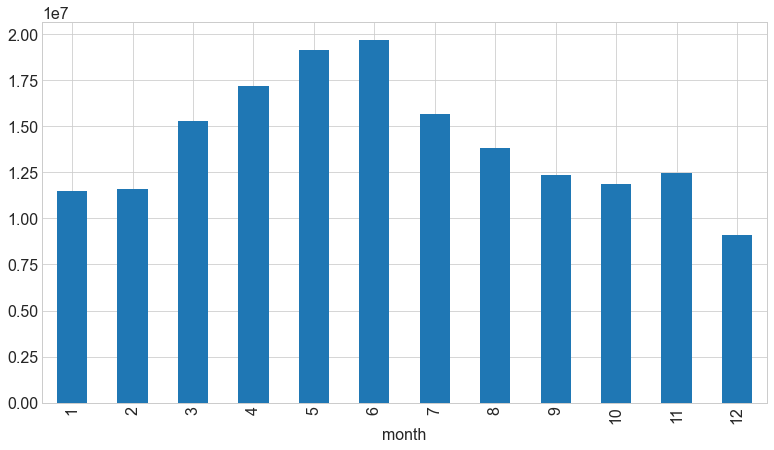

In [11]:
# total sales by month all stores all products
train1['month'] = train1.index.month
train1.groupby('month').sales_total.sum().plot.bar()

<AxesSubplot:xlabel='weekday', ylabel='sales_total'>

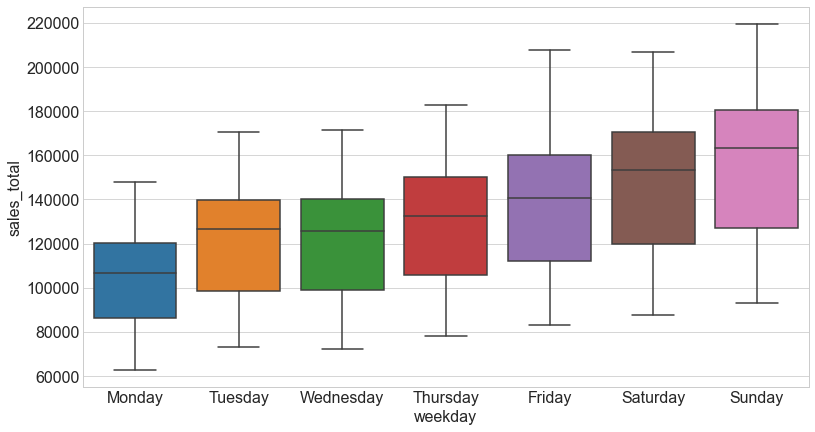

In [13]:
train1['weekday'] = train1.index.day_name()
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(data=train1, y='sales_total', x='weekday', order=order)

In [ ]:
# Visualize the target over time
y.plot()

In [ ]:
# visualize 3 day average sales
y.resample('3D').mean().plot(title='6 day average')

In [ ]:
# visualize 2 week average sales
y.resample('2W').mean().plot(title='2 week average')

In [ ]:
# visualize monthly average sales
y.resample('M').mean().plot(title='monthly')

In [ ]:
# visualize monthly min, mean, max sales
y.resample('M').agg(['min', 'mean', 'max']).plot()

In [ ]:
y.plot(alpha=.2, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

In [ ]:
y.plot(alpha=.2, label='Daily')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

In [ ]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in average total sales')

In [ ]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in average total sales')

In [ ]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal average Sales Plot')

In [ ]:
# unstack without the (0) will break out columns monthly instead of yearly
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), ls='--')
    ax.set(xlabel='')
axs[0].set(ylabel='average monthly total sales')    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

In [ ]:
# lag plot
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

In [ ]:
# another way to get to same visual
train['y(t + 1)'] = train.sales_total.shift(-1)
ax = train.plot.scatter(x='sales_total', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

In [ ]:
del train['y(t + 1)']
del train['month']
train.head()

In [ ]:
# this week to next week shift
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

In [ ]:
# this week to next quarter-ish (12 week shift)
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.sales_total.shift(-12)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

In [ ]:
# half year shift
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.sales_total.shift(-26)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly

In [ ]:
# built in way to do this with pandas
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=26)

In [ ]:
# auto correction plot
# peaks and valleys outside the lines = reliably say seasonal,
# if all within dashed lines atribute to random noise
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

In [ ]:
# seasonal decomposition
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

In [ ]:
decomposition.iloc[:, 1:].plot()

In [ ]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

In [ ]:
# categories over time
# create a categorical feature
train['sales_bin'] = pd.qcut(train.sales_total, 4, labels=['low', 'mid', 'upper_mid', 'high'])
train.groupby('sales_bin').mean()

In [ ]:
(train.groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

In [ ]:
ax = (train['2015']
 .groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)

In [ ]:
# strftime = string format time
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None

In [ ]:
# matplotlib dates
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))

# Germany Dataset

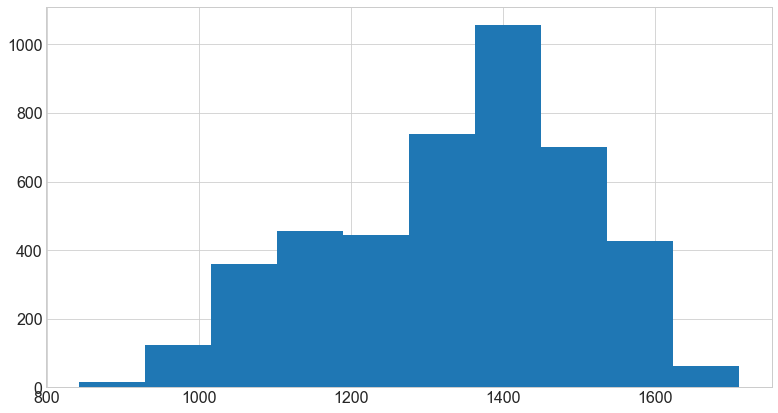

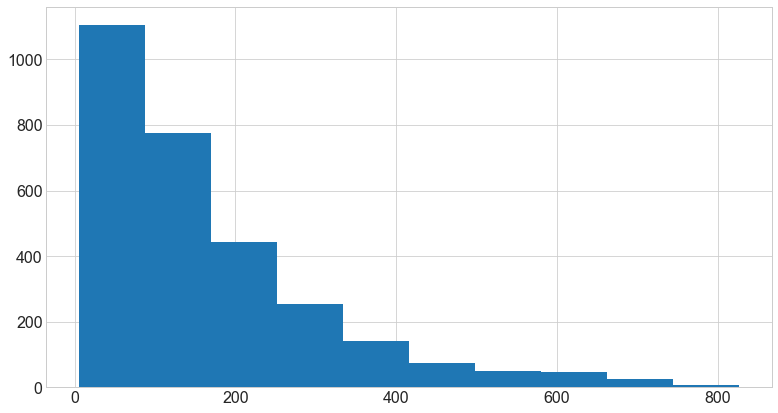

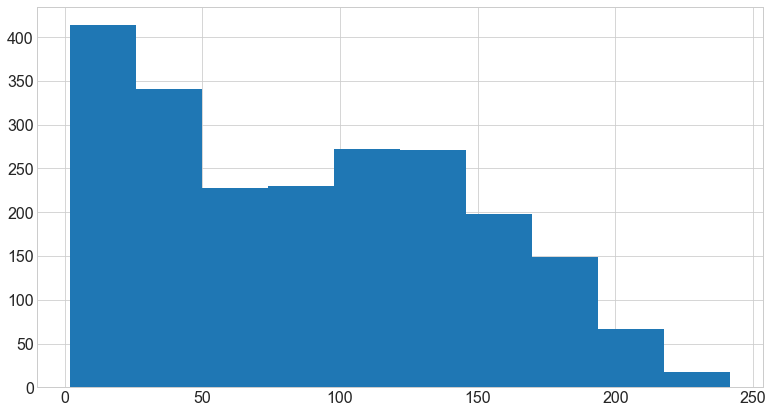

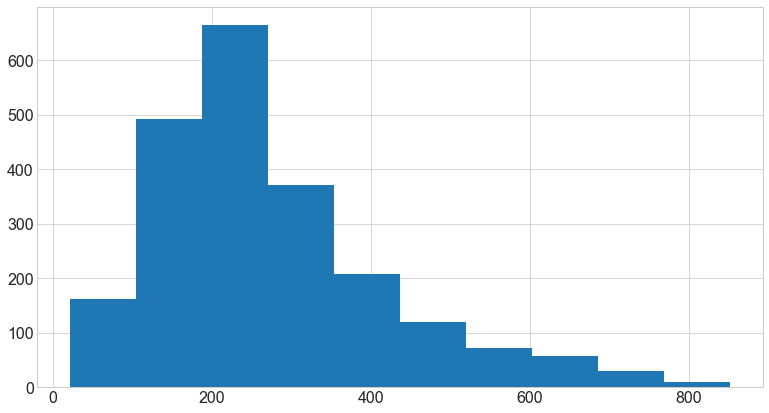

,Consumption,Wind,Solar,Wind+Solar,Month,Year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


In [3]:
g_df = acquire.opsd_germany_daily()
g_df = prepare.prep_germany_data(g_df)
g_df.head()

In [15]:
tardf = explore.average_df(g_df, 'Consumption', 'D')
tardf.head()

,Consumption
Date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


((3068, 1), (1315, 1))

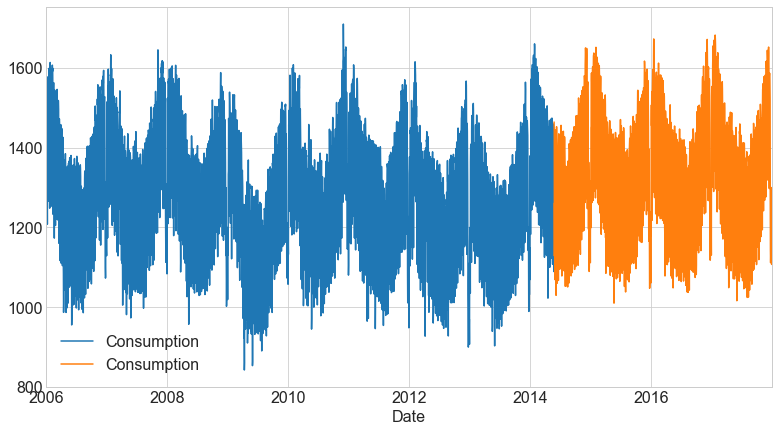

In [16]:
train2, test2 = explore.split_data_percent(tardf)
train2.shape, test2.shape


In [17]:
y=train2.Consumption
y.head()

Date
2006-01-01    1069.184
2006-01-02    1380.521
2006-01-03    1442.533
2006-01-04    1457.217
2006-01-05    1477.131
Freq: D, Name: Consumption, dtype: float64

<AxesSubplot:ylabel='Frequency'>

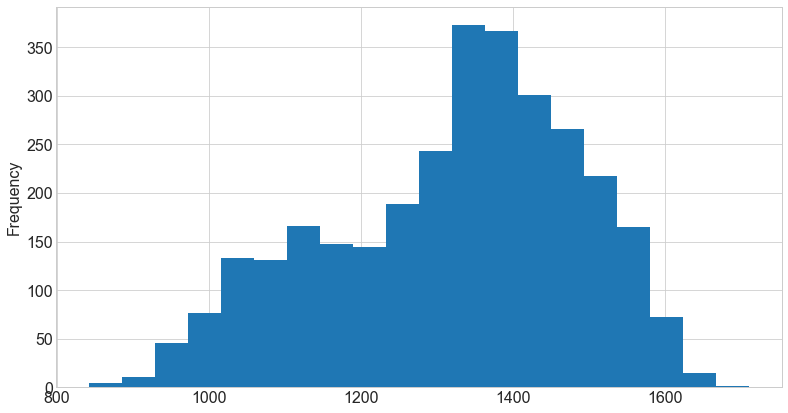

In [20]:
y.plot.hist(bins=20)

<AxesSubplot:xlabel='month'>

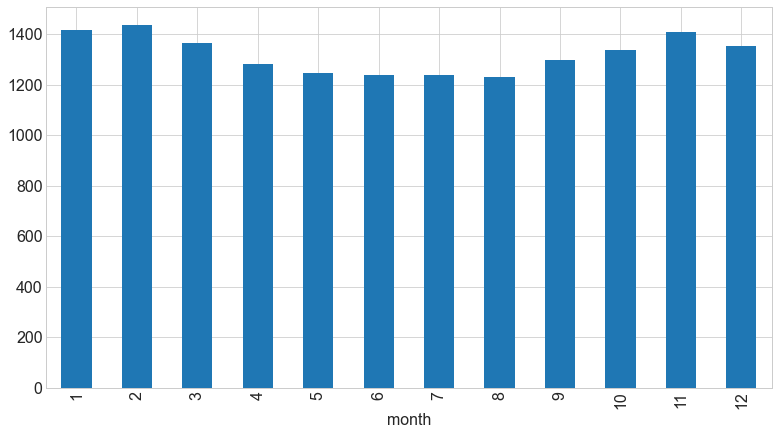

In [22]:
train2['month'] = train2.index.month
train2.groupby('month').Consumption.mean().plot.bar()

<AxesSubplot:xlabel='year'>

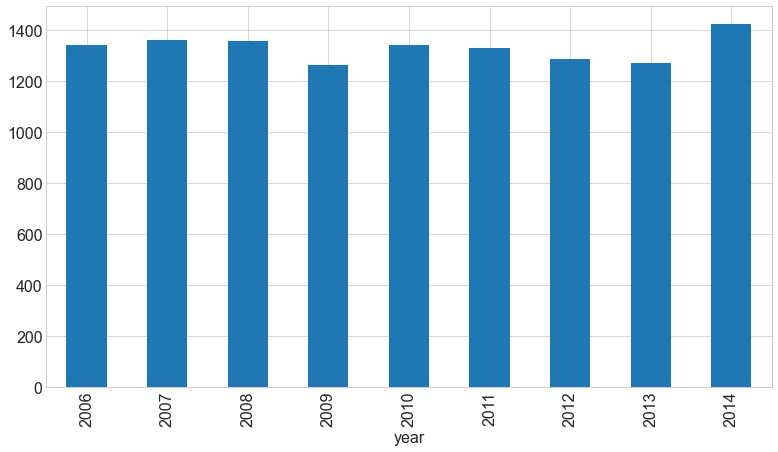

In [27]:
train2['year'] = train2.index.year
train2.groupby('year').Consumption.mean().plot.bar()

<AxesSubplot:xlabel='weekday', ylabel='Consumption'>

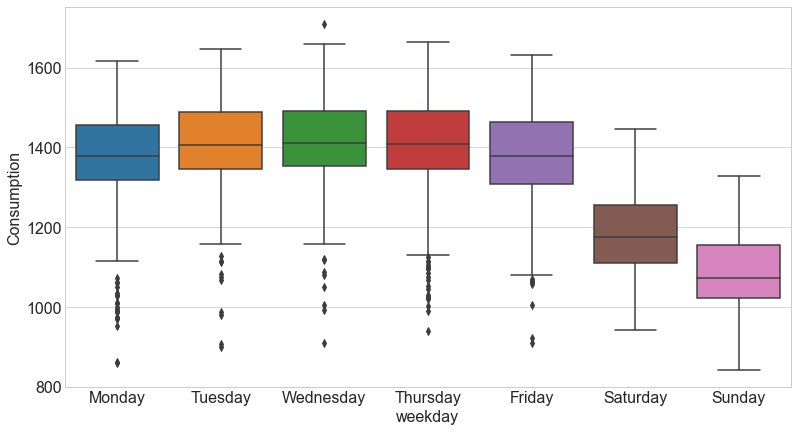

In [28]:
train2['weekday'] = train2.index.day_name()
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(data=train2, y='Consumption', x='weekday', order=order)

# Original Explore Exercises before curriculum updated

The end result of this exercise should be a Jupyter notebook or Python script named explore.

Remember to document your thoughts and any takeaways as you work through visualizations!

Using your store items data you prepped in lesson 2 exercises:     

1. Split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method.
2. Validate your splits by plotting X_train and y_train.
3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.
4. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.
5. Plot a time series decomposition.
6. Create a lag plot (day over day).
7. Run a lag correlation.

Using your OPS data you prepped in lesson 2 exercises:    

1. Split your data into train and test using the percent cutoff method.
2. Validate your splits by plotting X_train and y_train.
3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.
4. Group the electricity consumption time series by month of year, to explore annual seasonality.
5. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.
6. Plot a time series decomposition. Takeaways?

If time:    

For each store I want to see how many items were sold over a period of time, for each item. Find a way to chart this. Hints: Subplots for the piece with the fewest distinct values (like store), x = time, y = count, color = item. If you have too many distinct items, you may need to plot the top n, while aggregating the others into an 'other' bucket.